<a href="https://colab.research.google.com/github/goverdhana-srihitha/file1/blob/master/Assignment_for_26_06_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Name : G sai srihitha 
#### 221710402014
#### Assignment for 26.06.2020

Assignment : https://docs.google.com/document/d/1ZEAt0gLLTxIe8nvxfVPP3DCPFk8N4K9R1X6IIhWzG0A/edit

1. Perform all the necessary data preprocessing steps required
2. Visualize the relationship between the features and the response using scatterplots
3. Check for correlation and observe if there is  any multicollinearity.
4. After building a Linear Regression Model, write down the interpretation of the model
5. Find out how well does the model fit the data?



Dataset : https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/Advertising.csv

#### Importing required libraries 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

## 1

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/Advertising.csv",index_col='Unnamed: 0')
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
df.shape  # 200 columns , 4 rows

(200, 4)

In [ ]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

No missing values in the considered dataset

In [ ]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


### Importing sklearn libraries

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder,StandardScaler  # for scaling and encoding 
from sklearn.model_selection import train_test_split           # for model spliting
from sklearn.metrics import r2_score, mean_absolute_error , mean_squared_error # for accuracy

In [ ]:
sc = StandardScaler()
df = pd.DataFrame(sc.fit_transform(df),columns=df.columns)
df.head()

,TV,radio,newspaper,sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683


## 2

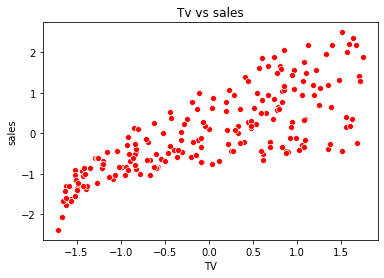

In [ ]:
sns.scatterplot(df.TV , df.sales,color='red')
plt.title("Tv vs sales")
plt.show()

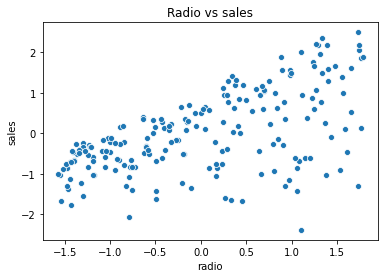

In [ ]:
sns.scatterplot(df.radio , df.sales)
plt.title("Radio vs sales")
plt.show()

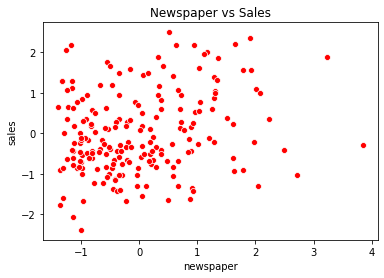

In [ ]:
sns.scatterplot(df.newspaper , df.sales,color='red')
plt.title("Newspaper vs Sales")
plt.show()

## 3

In [ ]:
# Correlation 
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


#### Observation :
The corr( ) values between the input is always > 0.75

corr( ) value between :  

TV and radio : 0.054

TV and newspaper : 0.056

radio and newspaper : 0.354

Therefore, no input columns are correlated so there is no multicollunearity.

## 4

In [ ]:
X = df.drop(['sales'],axis=1)
y = df.sales
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lr.intercept_)
print(lr.coef_)

0.0011620874606385126
[0.77081214 0.50806629 0.01079522]


#### Interpretation of the model :
The intercept on the y-axis at 0.00116

and the coeffient of  is 0.77081214 0.50806629 0.01079522 respectively , the effect of the inputs TV, Radio and newspaper 

TV > Radio > Newspaper 

Among 3 categories , it can be interpreted that the model choses TV , model thinks that the amount spent on TV commercials

TV commercials is of great significance as it brings in much more sales than any other  Media 


## 5

In [ ]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

Text(0.5, 1.0, 'Training Data')

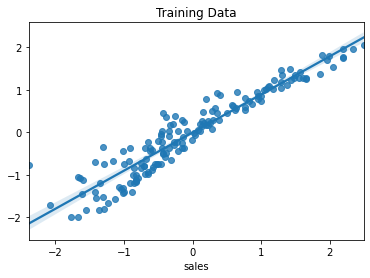

In [ ]:
sns.regplot(y_train,y_train_pred)
plt.title('Training Data')

It can be observed that the model is working good,
and that there is not much differnce between the ACTUAL and PREDICTED values
of the training data.
This can be inferred from the graph by noticing that there are less 
residual values(the values that are far away from the reg line), indicating minimal error in the prediction



Text(0.5, 1.0, 'Testing Data')

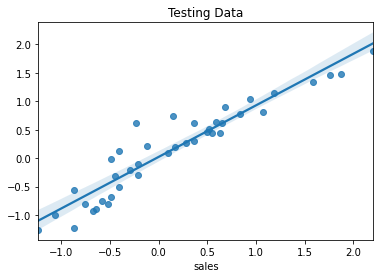

In [ ]:
sns.regplot(y_test,y_test_pred)
plt.title('Testing Data')


The model appears to work with almost same accuracy, and,
there is not much difference between the ACTUAL and PREDICTED values
of the testing data.
This can be infered from the data ny noticing that the residual values
are pretty less, indicating minimal error in the prediction.

In [ ]:
#lets now check the accuracy using metrics:
#Using Statistical Metrics:
print('Training Metrics:\n')
print('R2 score: ',r2_score(y_train,y_train_pred))
print('Adjusted R2 score: ',1- (1-r2_score(y_train, y_train_pred))*(len(X_train)-1)/
                                  (len(X_train)-X_train.shape[1]-1))
print('MAE: ',mean_absolute_error(y_train,y_train_pred))
print('MSE: ',mean_squared_error(y_train,y_train_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_train,y_train_pred)))
print('\nTesting Metrics:\n')
print('R2 score:', r2_score(y_test,y_test_pred))
print('Adjusted R2 score:', 1- (1-r2_score(y_test, y_test_pred))*(len(X_test)-1)/
                                  (len(X_test)-X_test.shape[1]-1))
print('MAE:', mean_absolute_error(y_test, y_test_pred))
print('MSE:', mean_squared_error(y_test, y_test_pred))
print('RMSE', np.sqrt(mean_squared_error(y_test, y_test_pred)))

Training Metrics:

R2 score:  0.8959372632325174
Adjusted R2 score:  0.8939360567562197
MAE:  0.2553322418777194
MSE:  0.11138075570325356
RMSE:  0.33373755512865727

Testing Metrics:

R2 score: 0.8927605914615385
Adjusted R2 score: 0.8838239740833334
MAE: 0.19987243199696367
MSE: 0.07353999839228295
RMSE 0.27118259234744946


From the above R2 scores of TRAIN and TEST data:
It can be inferred that the model has an 89% accuracy in predicting Training data
and an 88% accuracy in predicting Testing data.
From the above values of the RMSE of TRAIN and TEST data:
It can be infered that the model has an error magnitude of 0.33 for Training data
and an error magnitude of 0.27 fro Testing data.

Github : https://github.com/goverdhana-srihitha/file1/blob/master/Assignment_for_26_06_2020.ipynb